In [147]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib as mpl
import matplotlib.animation as animation
from tqdm import tqdm
import scipy.integrate as integrate

In [257]:
Min, Max, step = -10,10.05,0.05

x = np.arange(Min,Max,step)

h = x[1]-x[0]
dx=x[1]-x[0]

In [258]:


def InitU():
    
    U = np.where(1-x**2<0,0,(1-x**2))
    

    
    return U
    
    
U_0=InitU()


In [259]:
def exact_sol(x,t):
    
    I=np.zeros_like(x)
    for i in range(len(x)):
    
     I[i]=1/np.sqrt(4*np.pi*t)*integrate.quad(lambda x_: np.exp(-(x[i]-x_)**2/(4*t))*(1-x_**2),-1,1)[0]
    
    return I


# Schéma explicite
 
 ## 18)

In [288]:

dt1 =0.002
t1=np.linspace(0, 0.4, int(0.4/dt1) + 1)


def create_tridiagonal(n, a, b, c):
    matrix = np.zeros((n,n))
    np.fill_diagonal(matrix, b)
    np.fill_diagonal(matrix[:-1, 1:], a)
    np.fill_diagonal(matrix[1:, :-1], c)
    return matrix


A =1/(dx**2) * create_tridiagonal(len(x) ,-1, 2, -1)


def Time_evolution(Uin,t,dt):
    
    U_=np.zeros([len(U_0),len(t)])
    U_[:,0]=Uin
    
    for i in tqdm(range(1,len(t))):
        
        U_[:,i]=np.dot((np.identity(len(x))-dt*A),U_[:,i-1])
        
        
    return U_

In [289]:
U=Time_evolution(U_0,t1,dt1)

100%|███████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 543.22it/s]


<IPython.core.display.Javascript object>


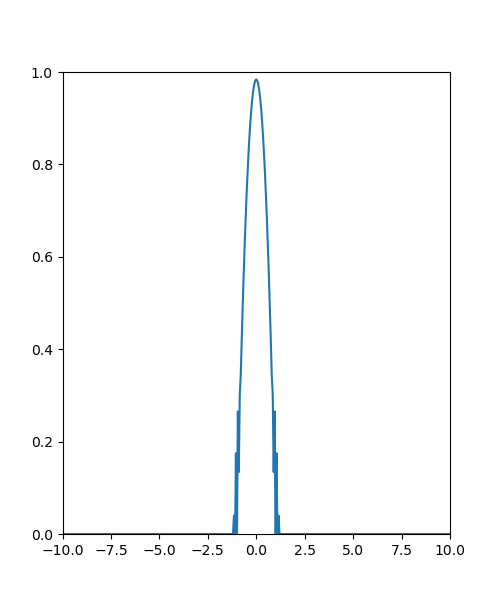

In [320]:
fig = plt.figure(figsize=(5,6))
ax = fig.add_subplot()



def init():
    
    
    ax.set_xlim(-10,10)
    ax.set_ylim(0,1)
    

def Update(i):

    ax.clear()
    init()
    
    ax.plot(x,U[:,i])
    
Animation = animation.FuncAnimation(fig,Update,frames=len(t[::1]),init_func=init)

## 19)

Ici pour $\Delta t=0.002$, $C=\Delta t/(\Delta x)^2 =0.8 $ et le methode diverge.

100%|███████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 547.19it/s]


<IPython.core.display.Javascript object>


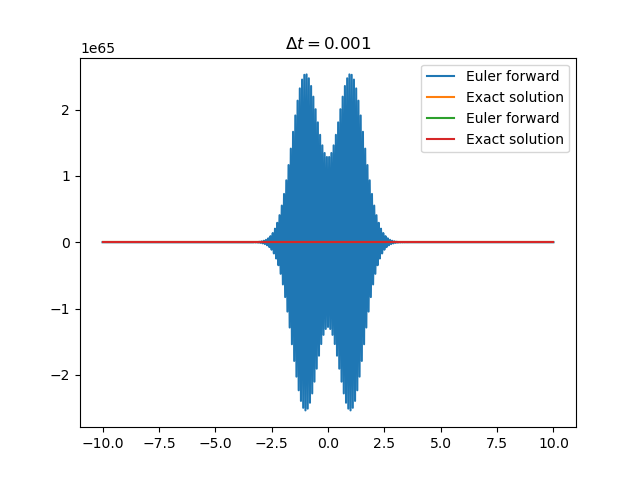

0.7999999999999773


In [300]:
dt1 =0.002
t1=np.linspace(0, 0.4, int(0.4/dt1) + 1)

U_1=Time_evolution(U_0,t1,dt1)
plt.plot(x,U_1[:,200],label="Euler forward")
lambda_ = dt1 / dx**2
print(lambda_)

U_ex=exact_sol(x,0.4002)   

plt.plot(x,U_ex,label="Exact solution")
plt.title("$\Delta t=0.002$")
plt.legend()

Si on prend  $\Delta t=0.001$, $\lambda=\Delta t/(\Delta x)^2 =0.4$ et le methode converge.

100%|███████████████████████████████████████████████████████████████████████████████| 400/400 [00:00<00:00, 581.69it/s]


<IPython.core.display.Javascript object>


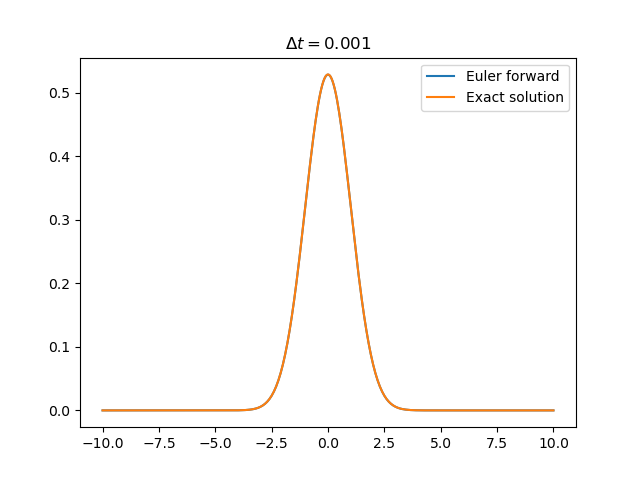

0.39999999999998864


In [303]:
dt2=0.001
t2=np.linspace(0, 0.4, int(0.4/dt2) + 1)


U_2=Time_evolution(U_0,t2,dt2)
plt.plot(x,U_2[:,400],label="Euler forward")
lambda_ = dt2 / dx**2
print(lambda_)

U_ex=exact_sol(x,0.4002)   

plt.plot(x,U_ex,label="Exact solution")
plt.title("$\Delta t=0.001$")
plt.legend()

<IPython.core.display.Javascript object>


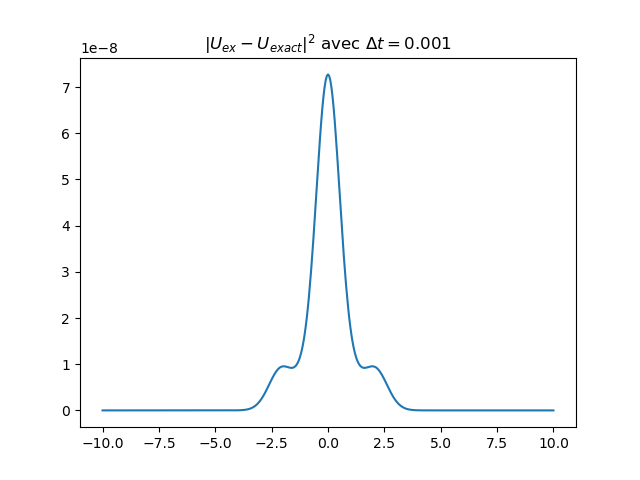

Text(0.5, 1.0, '$|U_{ex}-U_{exact}|^2$ avec $\\Delta t=0.001$')

In [333]:

plt.plot(x,(U_2[:,400]-U_ex)**2)
plt.title("$|U_{ex}-U_{exact}|^2$ avec $\Delta t=0.001$")

## 20)

Ici pour $\Delta t=0.02$, $\lambda=\Delta t/(\Delta x)^2 > 1/2 $ et le methode diverge. Las oscilations ne sont pas physiques, elles viennent d'une croissance exponential de l'erreur quand $\lambda>1/2$.

100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 398.70it/s]


<IPython.core.display.Javascript object>


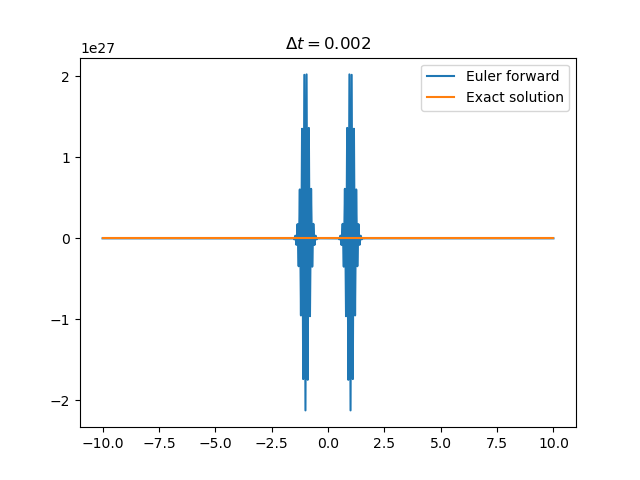

0.7999999999999773


In [323]:
dt3 =0.02
t3=np.linspace(0, 0.4, int(0.4/dt3) + 1)

U_3=Time_evolution(U_0,t3,dt3)
plt.plot(x,U_3[:,20],label="Euler forward")
lambda_ = dt1 / dx**2
print(lambda_)

U_ex=exact_sol(x,0.4002)   

plt.plot(x,U_ex,label="Exact solution")
plt.title("$\Delta t=0.002$")
plt.legend()

# Schéma Implicite
## 21)

In [325]:
def Time_evolution_im(Uin,t,dt):
    
    U_=np.zeros([len(U_0),len(t)])
    U_[:,0]=Uin
    
    for i in tqdm(range(1,len(t))):
        
        U_[:,i]=np.linalg.solve(np.identity(len(x)) + dt*A, U_[:, i-1])
        
        
    return U_

## 22)

100%|███████████████████████████████████████████████████████████████████████████████| 200/200 [00:01<00:00, 193.10it/s]


<IPython.core.display.Javascript object>


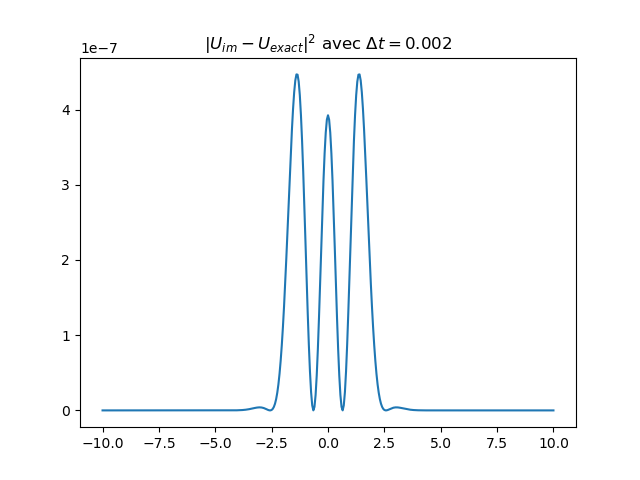

Text(0.5, 1.0, '$|U_{im}-U_{exact}|^2$ avec $\\Delta t=0.002$')

In [343]:
dt4=0.002
t4=np.linspace(0, 0.4, int(0.4/dt4) + 1)


U_4=Time_evolution_im(U_0,t4,dt4)



U_ex=exact_sol(x,0.4002)   

plt.plot(x,(U_4[:,200]-U_ex)**2)
plt.title("$|U_{im}-U_{exact}|^2$ avec $\Delta t=0.002$")


Le schéma implicite est moins precise mais plus stable

## 23)

100%|███████████████████████████████████████████████████████████████████████████████| 200/200 [00:01<00:00, 190.49it/s]


<IPython.core.display.Javascript object>


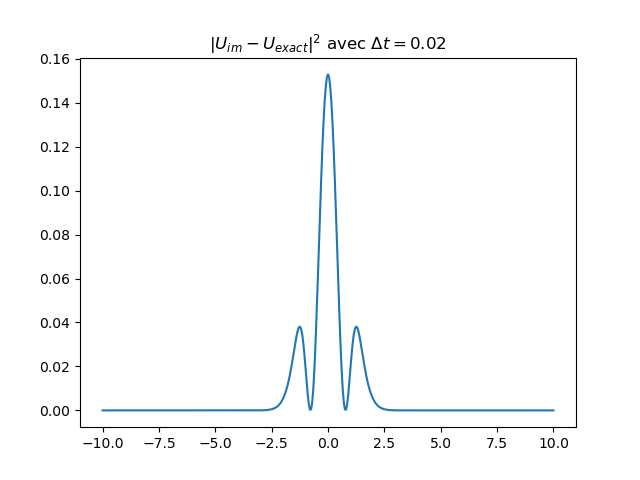

Text(0.5, 1.0, '$|U_{im}-U_{exact}|^2$ avec $\\Delta t=0.02$')

In [344]:
dt5=0.02
t5=np.linspace(0, 0.4, int(0.4/dt4) + 1)


U_5=Time_evolution_im(U_0,t5,dt5)


U_ex=exact_sol(x,0.4002)   

plt.plot(x,(U_4[:,20]-U_ex)**2)
plt.title("$|U_{im}-U_{exact}|^2$ avec $\Delta t=0.02$")


## 24 )

100%|███████████████████████████████████████████████████████████████████████████████| 320/320 [00:00<00:00, 571.49it/s]

0.4999999999999858


<IPython.core.display.Javascript object>


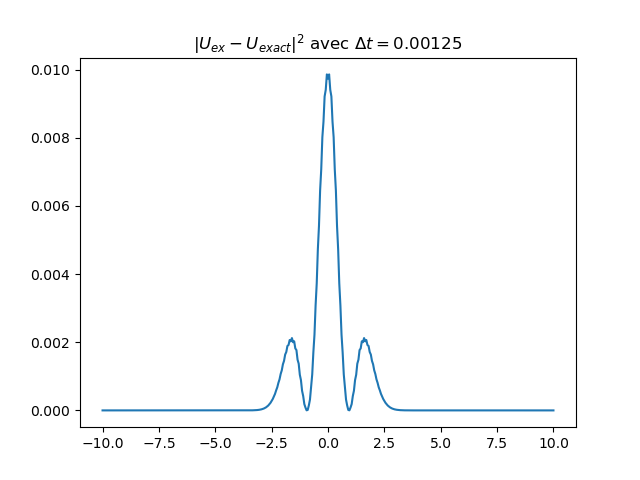

Text(0.5, 1.0, '$|U_{ex}-U_{exact}|^2$ avec $\\Delta t=0.00125$')

In [342]:
dt6=0.00125
t6=np.linspace(0, 0.4, int(0.4/dt6) + 1)


U_6=Time_evolution(U_0,t6,dt6)

C = dt6 / dx**2
print(C)

U_ex=exact_sol(x,0.4002)   

plt.plot(x,(U_6[:,200]-U_ex)**2)
plt.title("$|U_{ex}-U_{exact}|^2$ avec $\Delta t=0.00125$")


Le methode converge si C=0.5

100%|███████████████████████████████████████████████████████████████████████████████| 317/317 [00:00<00:00, 531.83it/s]

0.5039999999999857


<IPython.core.display.Javascript object>


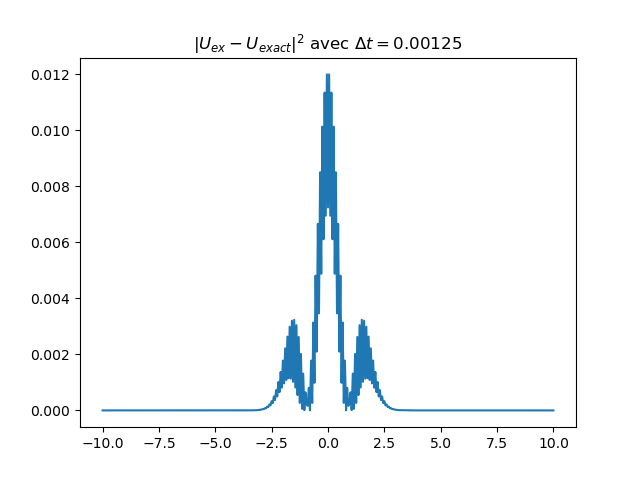

Text(0.5, 1.0, '$|U_{ex}-U_{exact}|^2$ avec $\\Delta t=0.00125$')

In [345]:
dt7=0.00126
t7=np.linspace(0, 0.4, int(0.4/dt7) + 1)


U_7=Time_evolution(U_0,t7,dt7)

C = dt7 / dx**2
print(C)

U_ex=exact_sol(x,0.4002)   

plt.plot(x,(U_7[:,200]-U_ex)**2)
plt.title("$|U_{ex}-U_{exact}|^2$ avec $\Delta t=0.00125$")


Avec C=0.504,des instabilités apparaissent.On peut concluire que $C<=0.5$